In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney-disease/kidney_disease.csv


In [166]:
data = pd.read_csv("../input/kidney-disease/kidney_disease.csv")
display(data.head())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [216]:
describe = data.describe()

numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [170]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [172]:
data["pcv"] = pd.to_numeric(data["pcv"], errors="coerce")
data["wc"] = pd.to_numeric(data["wc"], errors="coerce")
data["rc"] = pd.to_numeric(data["rc"], errors="coerce")


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [140]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [174]:
# Her sütundaki eksik değer oranını hesapla
missing_ratio = data.isnull().sum() / len(data) * 100

# Sonuçları yazdır
print("Eksik Veri Oranları (%):")
print(missing_ratio)


Eksik Veri Oranları (%):
id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


In [175]:
data = data.drop(columns = ["id"])

In [176]:
# Sadece `object` tipindeki sütunları seç
object_columns = data.select_dtypes(include=['object']).columns

# Her sütundaki eksik değerleri mod ile doldur
for col in object_columns:
    mode_value = data[col].mode()[0]  # Mod değerini al
    data[col].fillna(mode_value, inplace=True)

# Sonucu yazdır
print("Eksik veriler dolduruldu:")
print(data)

Eksik veriler dolduruldu:
      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv      wc   rc  h

In [177]:
# Sadece numerik sütunları seç
numeric_columns = data.select_dtypes(include=['number']).columns

# Her sütundaki eksik değerleri medyan ile doldur
for col in numeric_columns:
    median_value = data[col].median()  # Medyan değerini al
    data[col].fillna(median_value, inplace=True)

# Sonucu yazdır
print("Eksik veriler dolduruldu:")
print(data)

Eksik veriler dolduruldu:
      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv      wc   rc  h

In [178]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [179]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [181]:

categori = [col for col in data.columns if data[col].dtype == "object"] # categoric veri
numeric = [col for col in data.columns if data[col].dtype != "object"] # float, int -> numeric


In [182]:
for col in categori:
    print(f"{col}: {data[col].unique()}")

rbc: ['normal' 'abnormal']
pc: ['normal' 'abnormal']
pcc: ['notpresent' 'present']
ba: ['notpresent' 'present']
htn: ['yes' 'no']
dm: ['yes' 'no' ' yes' '\tno' '\tyes']
cad: ['no' 'yes' '\tno']
appet: ['good' 'poor']
pe: ['no' 'yes']
ane: ['no' 'yes']
classification: ['ckd' 'ckd\t' 'notckd']


In [183]:
from sklearn.preprocessing import LabelEncoder

# Sadece `object` tipindeki sütunları seç
object_columns = data.select_dtypes(include=['object']).columns

# Label Encoding uygulamak
label_encoders = {}  # Her sütun için LabelEncoder'ı saklamak için bir sözlük
for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Label Encoding işlemi
    label_encoders[col] = le  # LabelEncoder'ı sakla

# Sonucu yazdır
print("Label Encoding uygulanmış veri seti:")
print(data)

Label Encoding uygulanmış veri seti:
      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv      wc  \
0    48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  44.0  7800.0   
1     7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  38.0  6000.0   
2    62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...  31.0  7500.0   
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0  6700.0   
4    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  35.0  7300.0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...     ...   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  47.0  6700.0   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  54.0  7800.0   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  49.0  6600.0   
398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  51.0  7200.0   
399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...  53.0  6800.0   

  

In [184]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0


In [186]:
independent_col = [col for col in data.columns if col != "pc"] # X
dependent_col = "pc" # y

In [187]:
X = data[independent_col]
y = data[dependent_col]

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [189]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [190]:
y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Confusion matrix: \n",cm)
print("classification_report: \n",cr)


Confusion matrix: 
 [[13 14]
 [ 6 87]]
classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.48      0.57        27
           1       0.86      0.94      0.90        93

    accuracy                           0.83       120
   macro avg       0.77      0.71      0.73       120
weighted avg       0.82      0.83      0.82       120



In [164]:
# Hiperparametrelerle DecisionTreeClassifier oluştur
dtc = DecisionTreeClassifier(
    criterion="gini",             # Gini kriteri
    splitter="best",              # En iyi bölünme stratejisi
    max_depth=5,                  # Maksimum derinlik
    min_samples_split=10,         # Minimum 10 örnekle bölünme
    min_samples_leaf=5,           # Yapraklarda minimum 5 örnek
    random_state=42               # Rastgelelik için sabit
)

# Modeli eğit
dtc.fit(X_train, y_train)

# Test verisinde tahmin yap
y_pred = dtc.predict(X_test)

# Doğruluk skorunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.2f}")

# Sınıflandırma raporunu yazdır
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Doğruluk: 0.82

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.87      0.90      0.88        93

    accuracy                           0.82       120
   macro avg       0.74      0.71      0.72       120
weighted avg       0.81      0.82      0.81       120



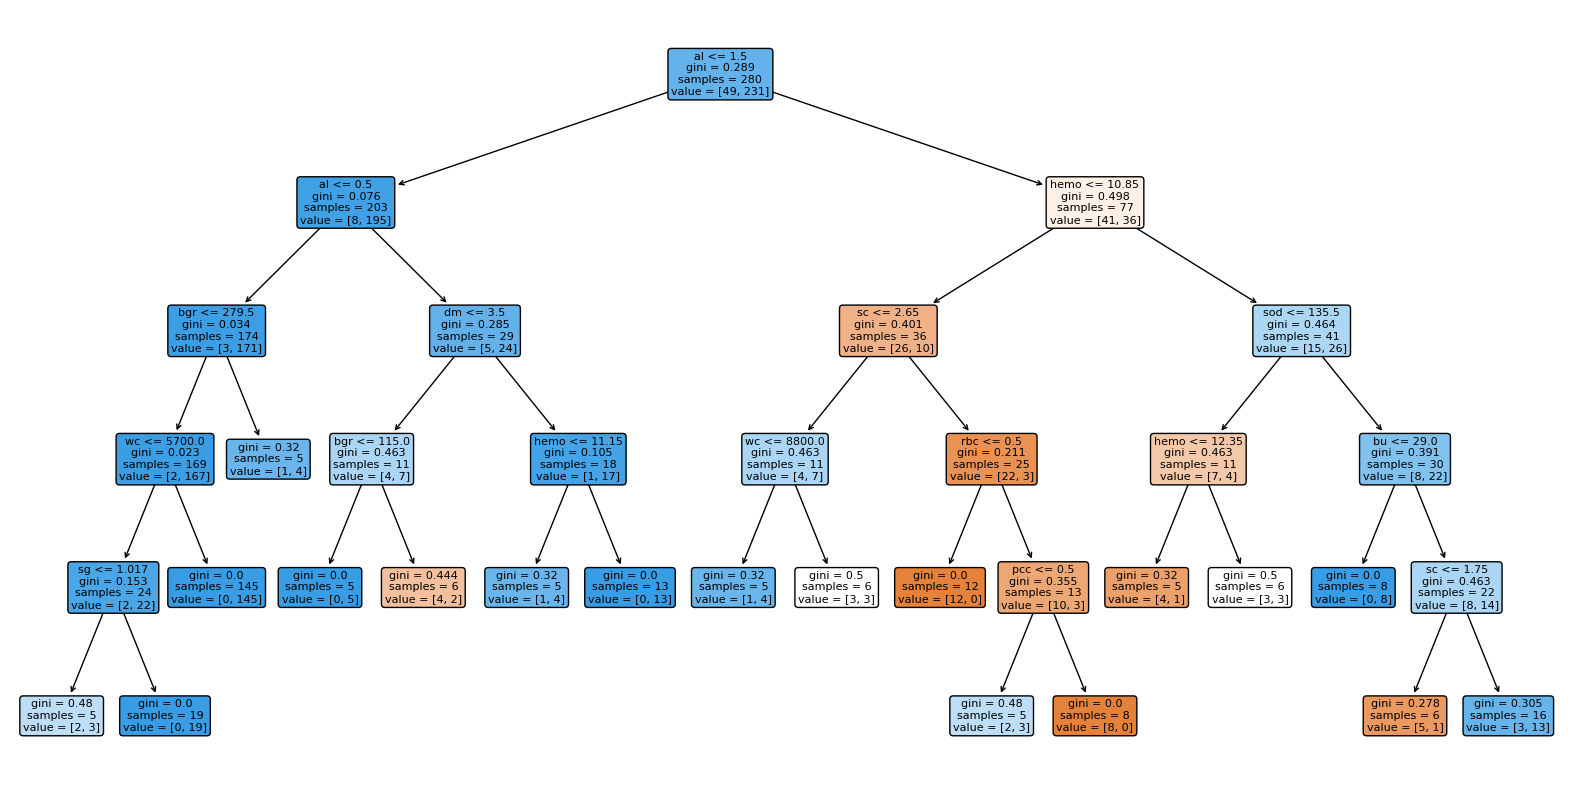

Most important feature:  Feature             al
Importance    0.520556
Name: 3, dtype: object


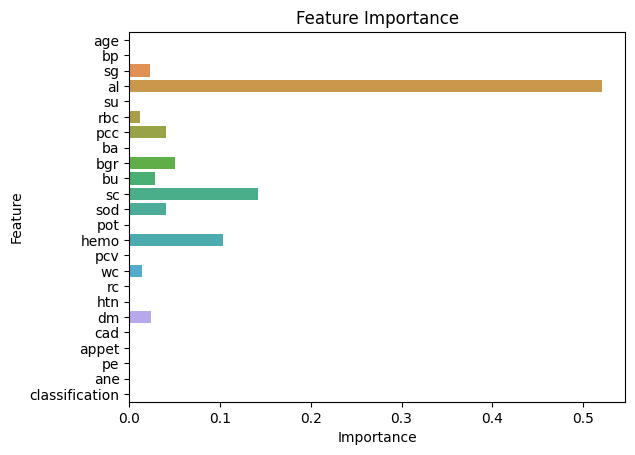

In [165]:
# DT visualization - feature importance

class_names = ["normal", "abnormal"]

plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=independent_col, filled=True, rounded=True, fontsize=8)
plt.show()

feature_importance = pd.DataFrame({"Feature":independent_col, "Importance":dtc.feature_importances_})

print("Most important feature: ",feature_importance.sort_values(by="Importance",ascending=False).iloc[0])

plt.figure()
sns.barplot(x = "Importance", y = "Feature", data = feature_importance)
plt.title("Feature Importance")
plt.show()


**Veri Artırma İşleminden Sonra**

In [192]:
# pc sütunundaki kategorilerin sayısını al
pc_counts = data['pc'].value_counts()

# Kategorilerin oranlarını hesapla
pc_percentage = (pc_counts / len(data)) * 100

# Sonuçları yazdır
print("pc sütunundaki kategorilerin sayıları ve oranları:")
print(pc_counts)
print("\npc sütunundaki kategorilerin oranları:")
print(pc_percentage)

pc sütunundaki kategorilerin sayıları ve oranları:
pc
1    324
0     76
Name: count, dtype: int64

pc sütunundaki kategorilerin oranları:
pc
1    81.0
0    19.0
Name: count, dtype: float64


In [207]:
independent_col_2 = [col for col in new_df.columns if col != "pc"] # X
dependent_col_2 = "pc" # y

In [212]:
X_2 = new_df[independent_col]
y_2 = new_df[dependent_col]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state=42)


In [214]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [215]:
y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Confusion matrix: \n",cm)
print("classification_report: \n",cr)


Confusion matrix: 
 [[65  3]
 [12 89]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        68
           1       0.97      0.88      0.92       101

    accuracy                           0.91       169
   macro avg       0.91      0.92      0.91       169
weighted avg       0.92      0.91      0.91       169



In [198]:
# pc sütunundaki kategorilerin sayısını al
pc_counts = data['pc'].value_counts()

# 1 kategorisinin sayısının %50'sini al
additional_zeros = int(pc_counts[1] * 0.5)

# 0 kategorisinin sayısını arttır
zeros_to_add = data[data['pc'] == 0].sample(n=additional_zeros, replace=True, random_state=42)

# Yeni 0'ları mevcut veri setine ekle
new_df = pd.concat([data, zeros_to_add], axis=0, ignore_index=True)

# Yeni pc kategorilerinin sayısını kontrol et
new_pc_counts = new_df['pc'].value_counts()

# Sonuçları yazdır
print("Yeni pc sütunundaki kategorilerin sayıları:")
print(new_pc_counts)

Yeni pc sütunundaki kategorilerin sayıları:
pc
1    324
0    238
Name: count, dtype: int64


In [200]:
new_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0


In [201]:
# pc sütunundaki kategorilerin sayısını al
pc_counts = new_df['pc'].value_counts()

# Kategorilerin oranlarını hesapla
pc_percentage = (pc_counts / len(new_df)) * 100

# Sonuçları yazdır
print("pc sütunundaki kategorilerin sayıları ve oranları:")
print(pc_counts)
print("\npc sütunundaki kategorilerin oranları:")
print(pc_percentage)

pc sütunundaki kategorilerin sayıları ve oranları:
pc
1    324
0    238
Name: count, dtype: int64

pc sütunundaki kategorilerin oranları:
pc
1    57.651246
0    42.348754
Name: count, dtype: float64
